Instructions for updating:
non-resource variables are not supported in the long term


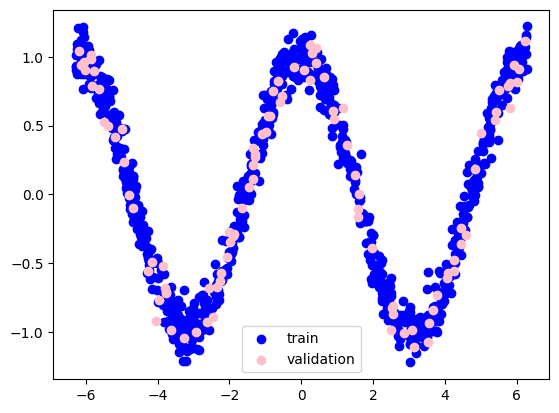

Instructions for updating:
Use `tf.global_variables_initializer` instead.
epoch 0, cost = 207.634


2023-11-19 11:13:48.457947: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


epoch 100, cost = 23.9917
epoch 200, cost = 22.774
epoch 300, cost = 21.2004
epoch 400, cost = 19.5644
epoch 500, cost = 18.0797
epoch 600, cost = 15.8948
epoch 700, cost = 12.7616
epoch 800, cost = 9.55989
epoch 900, cost = 6.83835
epoch 1000, cost = 4.64042
epoch 1100, cost = 2.9561
epoch 1200, cost = 1.78523
epoch 1300, cost = 1.08394
epoch 1400, cost = 0.736783


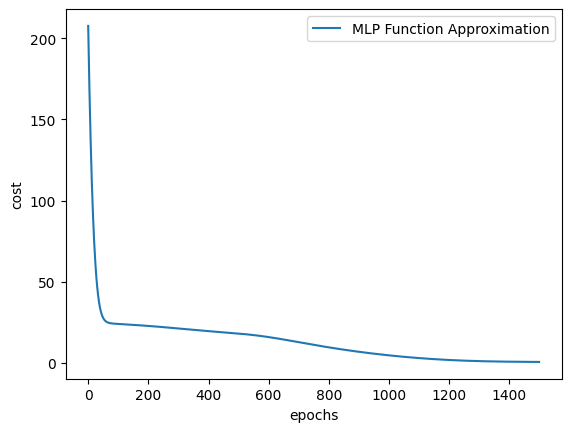

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np 
import matplotlib.pyplot as plt 
import math

np.random.seed(1000) 

# Define the function to learn
function_to_learn = lambda x: np.cos(x) + 0.1 * np.random.randn(*x.shape) 

# Model parameters
layer_1_neurons = 10 
batch_size = 100 
NUM_points = 1000 
NUM_EPOCHS = 1500 

# Generate random data
all_x = np.float32(np.random.uniform(-2 * math.pi, 2 * math.pi, (1, NUM_points))).T 
np.random.shuffle(all_x) 

# Split the data into training and validation sets
train_size = int(900) 
x_training = all_x[:train_size]
y_training = function_to_learn(x_training)

x_validation = all_x[train_size:] 
y_validation = function_to_learn(x_validation) 

# Plot the data
plt.figure(1) 
plt.scatter(x_training, y_training, c='blue', label='train') 
plt.scatter(x_validation, y_validation, c='pink', label='validation') 
plt.legend() 
plt.show() 

# Define placeholders for input and output
X = tf.placeholder(tf.float32, [None, 1], name="X") 
Y = tf.placeholder(tf.float32, [None, 1], name="Y") 

# Define the neural network architecture
w_h = tf.Variable(tf.random_uniform([1, layer_1_neurons], minval=-1, maxval=1, dtype=tf.float32)) 
b_h = tf.Variable(tf.zeros([1, layer_1_neurons], dtype=tf.float32)) 
h = tf.nn.sigmoid(tf.matmul(X, w_h) + b_h) 

w_o = tf.Variable(tf.random_uniform([layer_1_neurons, 1], minval=-1, maxval=1, dtype=tf.float32)) 
b_o = tf.Variable(tf.zeros([1, 1], dtype=tf.float32)) 

# Define the model
model = tf.matmul(h, w_o) + b_o 

# Define the loss and optimization
train_op = tf.train.AdamOptimizer().minimize(tf.nn.l2_loss(model - Y)) 

# Initialize TensorFlow session
sess = tf.Session() 
sess.run(tf.initialize_all_variables()) 

# Training loop
errors = [] 
for i in range(NUM_EPOCHS): 
    for start, end in zip(range(0, len(x_training), batch_size),
                          range(batch_size, len(x_training), batch_size)): 
        sess.run(train_op, feed_dict={X: x_training[start:end], Y: y_training[start:end]}) 
    cost = sess.run(tf.nn.l2_loss(model - y_validation), feed_dict={X: x_validation}) 
    errors.append(cost) 

    if i % 100 == 0: 
        print("epoch %d, cost = %g" % (i, cost)) 

# Plot the training progress
plt.plot(errors, label='MLP Function Approximation') 
plt.xlabel('epochs') 
plt.ylabel('cost') 
plt.legend() 
plt.show()


In [4]:
#!/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/bin/python -m pip install tensorflow
